## Business Objective 4

Perform Customer Segmentation of customers who took auto insurance.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
sns.set()

### Data Dictionary

In [4]:
auto = pd.read_csv('AutoInsurance (1).csv')

In [5]:
auto.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [6]:
auto1 = auto.copy(deep=True)

### Exploratory Data Analysis

In [7]:
auto1.sample(5)

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
6133,OH93496,Arizona,3703.404606,No,Basic,Bachelor,10/1/2011,Unemployed,M,0,...,5,0,1,Personal Auto,Personal L3,Offer1,Agent,784.800000,SUV,Small
2923,SC11374,Nevada,8797.829644,No,Basic,College,2/28/11,Employed,F,80780,...,11,0,3,Corporate Auto,Corporate L3,Offer2,Agent,3.550000,SUV,Medsize
7225,NW14895,Arizona,12883.115730,No,Basic,Bachelor,2/1/2011,Employed,M,77469,...,98,1,2,Personal Auto,Personal L2,Offer1,Agent,757.170246,SUV,Small
1859,BP28492,Arizona,4834.710493,Yes,Basic,College,1/31/11,Employed,F,38713,...,69,4,6,Corporate Auto,Corporate L3,Offer2,Call Center,316.800000,Four-Door Car,Medsize
1152,DQ28641,Nevada,2665.222511,No,Basic,High School or Below,9/1/2011,Medical Leave,M,14315,...,16,0,1,Personal Auto,Personal L1,Offer2,Branch,511.200000,Four-Door Car,Medsize


In [8]:
auto1.shape

(9134, 24)

In [9]:
auto1.var()

C:\Users\AANAND~1.ORA\AppData\Local\Temp/ipykernel_21640/3023611819.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  auto1.var()


Customer Lifetime Value          4.721020e+07
Income                           9.229386e+08
Monthly Premium Auto             1.183908e+03
Months Since Last Claim          1.014705e+02
Months Since Policy Inception    7.787443e+02
Number of Open Complaints        8.287982e-01
Number of Policies               5.712969e+00
Total Claim Amount               8.439030e+04
dtype: float64

In [10]:
auto1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

In [11]:
#all unique values.can be dropped
auto1['Customer'].nunique()

9134

In [12]:
auto1.drop(['Customer'],axis=1,inplace=True)

In [13]:
#ordinal_features = []
#nominal_features = ['State']
auto1['State'].value_counts()

California    3150
Oregon        2601
Arizona       1703
Nevada         882
Washington     798
Name: State, dtype: int64

In [14]:
#ordinal_features = []
#nominal_features = ['State','Response']
auto1['Response'].value_counts()

No     7826
Yes    1308
Name: Response, dtype: int64

In [15]:
#ordinal_features = ['Coverage']
#nominal_features = ['State','Response']
auto1['Coverage'].value_counts()

Basic       5568
Extended    2742
Premium      824
Name: Coverage, dtype: int64

In [16]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response']
auto1['Education'].value_counts()

Bachelor                2748
College                 2681
High School or Below    2622
Master                   741
Doctor                   342
Name: Education, dtype: int64

In [17]:
#since all are in 2011 , we could extract just the month for analysis
auto1['Effective To Date'].value_counts()

10/1/2011    195
1/27/11      194
2/14/11      186
1/26/11      181
1/17/11      180
1/19/11      179
1/31/11      178
3/1/2011     178
1/20/11      173
2/26/11      169
1/28/11      169
2/19/11      168
5/1/2011     167
2/27/11      167
11/1/2011    166
4/2/2011     164
10/2/2011    161
2/28/11      161
2/1/2011     160
1/21/11      160
1/29/11      160
2/22/11      158
5/2/2011     158
3/2/2011     158
7/2/2011     157
12/2/2011    156
1/23/11      155
1/2/2011     154
1/18/11      154
1/15/11      153
1/14/11      152
11/2/2011    151
7/1/2011     151
1/25/11      151
2/25/11      149
8/1/2011     149
2/18/11      149
2/2/2011     149
1/1/2011     148
2/21/11      148
1/24/11      147
9/1/2011     146
1/30/11      145
1/13/11      145
6/2/2011     144
6/1/2011     143
2/23/11      143
1/16/11      142
2/16/11      139
2/13/11      139
2/24/11      139
9/2/2011     137
2/17/11      136
1/22/11      136
8/2/2011     134
2/20/11      132
2/15/11      130
12/1/2011    126
4/1/2011     1

In [18]:
#convert to datetime
auto1['Effective To Date'] = pd.DataFrame(pd.to_datetime(auto1['Effective To Date']))

In [19]:
#extract month and add new column
auto1['to month']= auto1['Effective To Date'].dt.month

In [20]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month']
auto1['to month'].value_counts()

1     3356
2     2722
10     356
3      336
5      325
11     317
7      308
6      287
8      283
9      283
12     282
4      279
Name: to month, dtype: int64

In [21]:
#drop effective to date field. we will use 'to month' field instead
auto1.drop(['Effective To Date'],axis=1,inplace=True)

In [22]:
auto1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [23]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus']
auto1['EmploymentStatus'].value_counts()

Employed         5698
Unemployed       2317
Medical Leave     432
Disabled          405
Retired           282
Name: EmploymentStatus, dtype: int64

In [24]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender']
auto1['Gender'].value_counts()

F    4658
M    4476
Name: Gender, dtype: int64

In [25]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code']
auto1['Location Code'].value_counts()

Suburban    5779
Rural       1773
Urban       1582
Name: Location Code, dtype: int64

In [26]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status']
auto1['Marital Status'].value_counts()

Married     5298
Single      2467
Divorced    1369
Name: Marital Status, dtype: int64

In [27]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
#                   'Policy Type']
auto1['Policy Type'].value_counts()

Personal Auto     6788
Corporate Auto    1968
Special Auto       378
Name: Policy Type, dtype: int64

In [28]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
#                   'Policy Type']
auto1['Policy'].value_counts()

Personal L3     3426
Personal L2     2122
Personal L1     1240
Corporate L3    1014
Corporate L2     595
Corporate L1     359
Special L2       164
Special L3       148
Special L1        66
Name: Policy, dtype: int64

In [29]:
#policy type info is captured in Policy feature. we can drop policy type.
auto1.drop(['Policy Type'],axis=1,inplace=True)

In [30]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
#                   'Policy','Renew Offer Type']
auto1['Renew Offer Type'].value_counts()

Offer1    3752
Offer2    2926
Offer3    1432
Offer4    1024
Name: Renew Offer Type, dtype: int64

In [31]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
#                   'Policy','Renew Offer Type','Sales Channel']
auto1['Sales Channel'].value_counts()

Agent          3477
Branch         2567
Call Center    1765
Web            1325
Name: Sales Channel, dtype: int64

In [32]:
#ordinal_features = ['Coverage','Education']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
#                   'Policy','Renew Offer Type','Sales Channel','Vehicle Class']
auto1['Vehicle Class'].value_counts()

Four-Door Car    4621
Two-Door Car     1886
SUV              1796
Sports Car        484
Luxury SUV        184
Luxury Car        163
Name: Vehicle Class, dtype: int64

In [33]:
#ordinal_features = ['Coverage','Education','Vehicle Size']
#nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
#                   'Policy','Renew Offer Type','Sales Channel','Vehicle Class']
auto1['Vehicle Size'].value_counts()

Medsize    6424
Small      1764
Large       946
Name: Vehicle Size, dtype: int64

In [34]:
auto1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          9134 non-null   object 
 1   Customer Lifetime Value        9134 non-null   float64
 2   Response                       9134 non-null   object 
 3   Coverage                       9134 non-null   object 
 4   Education                      9134 non-null   object 
 5   EmploymentStatus               9134 non-null   object 
 6   Gender                         9134 non-null   object 
 7   Income                         9134 non-null   int64  
 8   Location Code                  9134 non-null   object 
 9   Marital Status                 9134 non-null   object 
 10  Monthly Premium Auto           9134 non-null   int64  
 11  Months Since Last Claim        9134 non-null   int64  
 12  Months Since Policy Inception  9134 non-null   i

In [35]:
auto1.isnull().sum()

State                            0
Customer Lifetime Value          0
Response                         0
Coverage                         0
Education                        0
EmploymentStatus                 0
Gender                           0
Income                           0
Location Code                    0
Marital Status                   0
Monthly Premium Auto             0
Months Since Last Claim          0
Months Since Policy Inception    0
Number of Open Complaints        0
Number of Policies               0
Policy                           0
Renew Offer Type                 0
Sales Channel                    0
Total Claim Amount               0
Vehicle Class                    0
Vehicle Size                     0
to month                         0
dtype: int64

Imputation not needed

In [36]:
auto1.duplicated().sum()

163

We ignore these as these are not duplicated once we add city name (auto)

In [37]:
ordinal_features = ['Coverage','Education','Vehicle Size']
nominal_features = ['State','Response','to month','EmploymentStatus','Gender','Location Code','Marital Status',
                   'Policy','Renew Offer Type','Sales Channel','Vehicle Class']
numeric_features = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                   'Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount',
                    'to month']
categorical_features = ['Coverage','Education','Vehicle Size','State','Response','EmploymentStatus','Gender',
                       'Location Code','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class']

In [38]:
auto1_num = auto1[numeric_features].copy(deep=True)

In [39]:
auto1_num.sample(2)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,to month
5371,25030.375450,26292,80,1,81,2,2,384.000000,2
2641,4050.506193,88454,101,8,89,0,1,308.749796,2


In [40]:
auto1_cat = auto1[categorical_features].copy(deep=True)

In [41]:
auto1_cat.sample(2)

,Coverage,Education,Vehicle Size,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
1202,Extended,Bachelor,Medsize,Oregon,No,Employed,M,Suburban,Single,Corporate L2,Offer4,Call Center,Four-Door Car
6237,Extended,High School or Below,Medsize,Oregon,No,Unemployed,M,Suburban,Divorced,Personal L3,Offer4,Agent,Four-Door Car


In [42]:
auto1_cat.shape

(9134, 13)

In [43]:
auto1_num.shape

(9134, 9)

In [44]:
auto1.shape

(9134, 22)

#### Univariate analysis

##### Moments

In [45]:
auto1_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Customer Lifetime Value,9134.0,8004.940475,6870.967608,1898.007675,3994.251794,5780.182197,8962.167041,83325.381190
Income,9134.0,37657.380009,30379.904734,0.000000,0.000000,33889.500000,62320.000000,99981.000000
Monthly Premium Auto,9134.0,93.219291,34.407967,61.000000,68.000000,83.000000,109.000000,298.000000
Months Since Last Claim,9134.0,15.097000,10.073257,0.000000,6.000000,14.000000,23.000000,35.000000
Months Since Policy Inception,9134.0,48.064594,27.905991,0.000000,24.000000,48.000000,71.000000,99.000000
Number of Open Complaints,9134.0,0.384388,0.910384,0.000000,0.000000,0.000000,0.000000,5.000000
Number of Policies,9134.0,2.966170,2.390182,1.000000,1.000000,2.000000,4.000000,9.000000
Total Claim Amount,9134.0,434.088794,290.500092,0.099007,272.258244,383.945434,547.514839,2893.239678
to month,9134.0,3.467156,3.326788,1.000000,1.000000,2.000000,5.000000,12.000000


we can see that the mean has varied range. We would want to Normalize the data.

In [46]:
#Fisher's Kurtosis
auto1_num.kurt(axis=0)

Customer Lifetime Value          13.823533
Income                           -1.094326
Monthly Premium Auto              6.193605
Months Since Last Claim          -1.073668
Months Since Policy Inception    -1.133046
Number of Open Complaints         7.749308
Number of Policies                0.363157
Total Claim Amount                5.979401
to month                          0.350915
dtype: float64

Customer Lifetime Value,Monthly Premium Auto,Number of Open Complaints & Total Claim Amount are leptokurtic

In [47]:
#skew
auto1_num.skew(axis=0)

Customer Lifetime Value          3.032280
Income                           0.286887
Monthly Premium Auto             2.123546
Months Since Last Claim          0.278586
Months Since Policy Inception    0.040165
Number of Open Complaints        2.783263
Number of Policies               1.253333
Total Claim Amount               1.714966
to month                         1.322653
dtype: float64

Total Refunds and Total Extra Data Charges are right skewed

##### Distributions

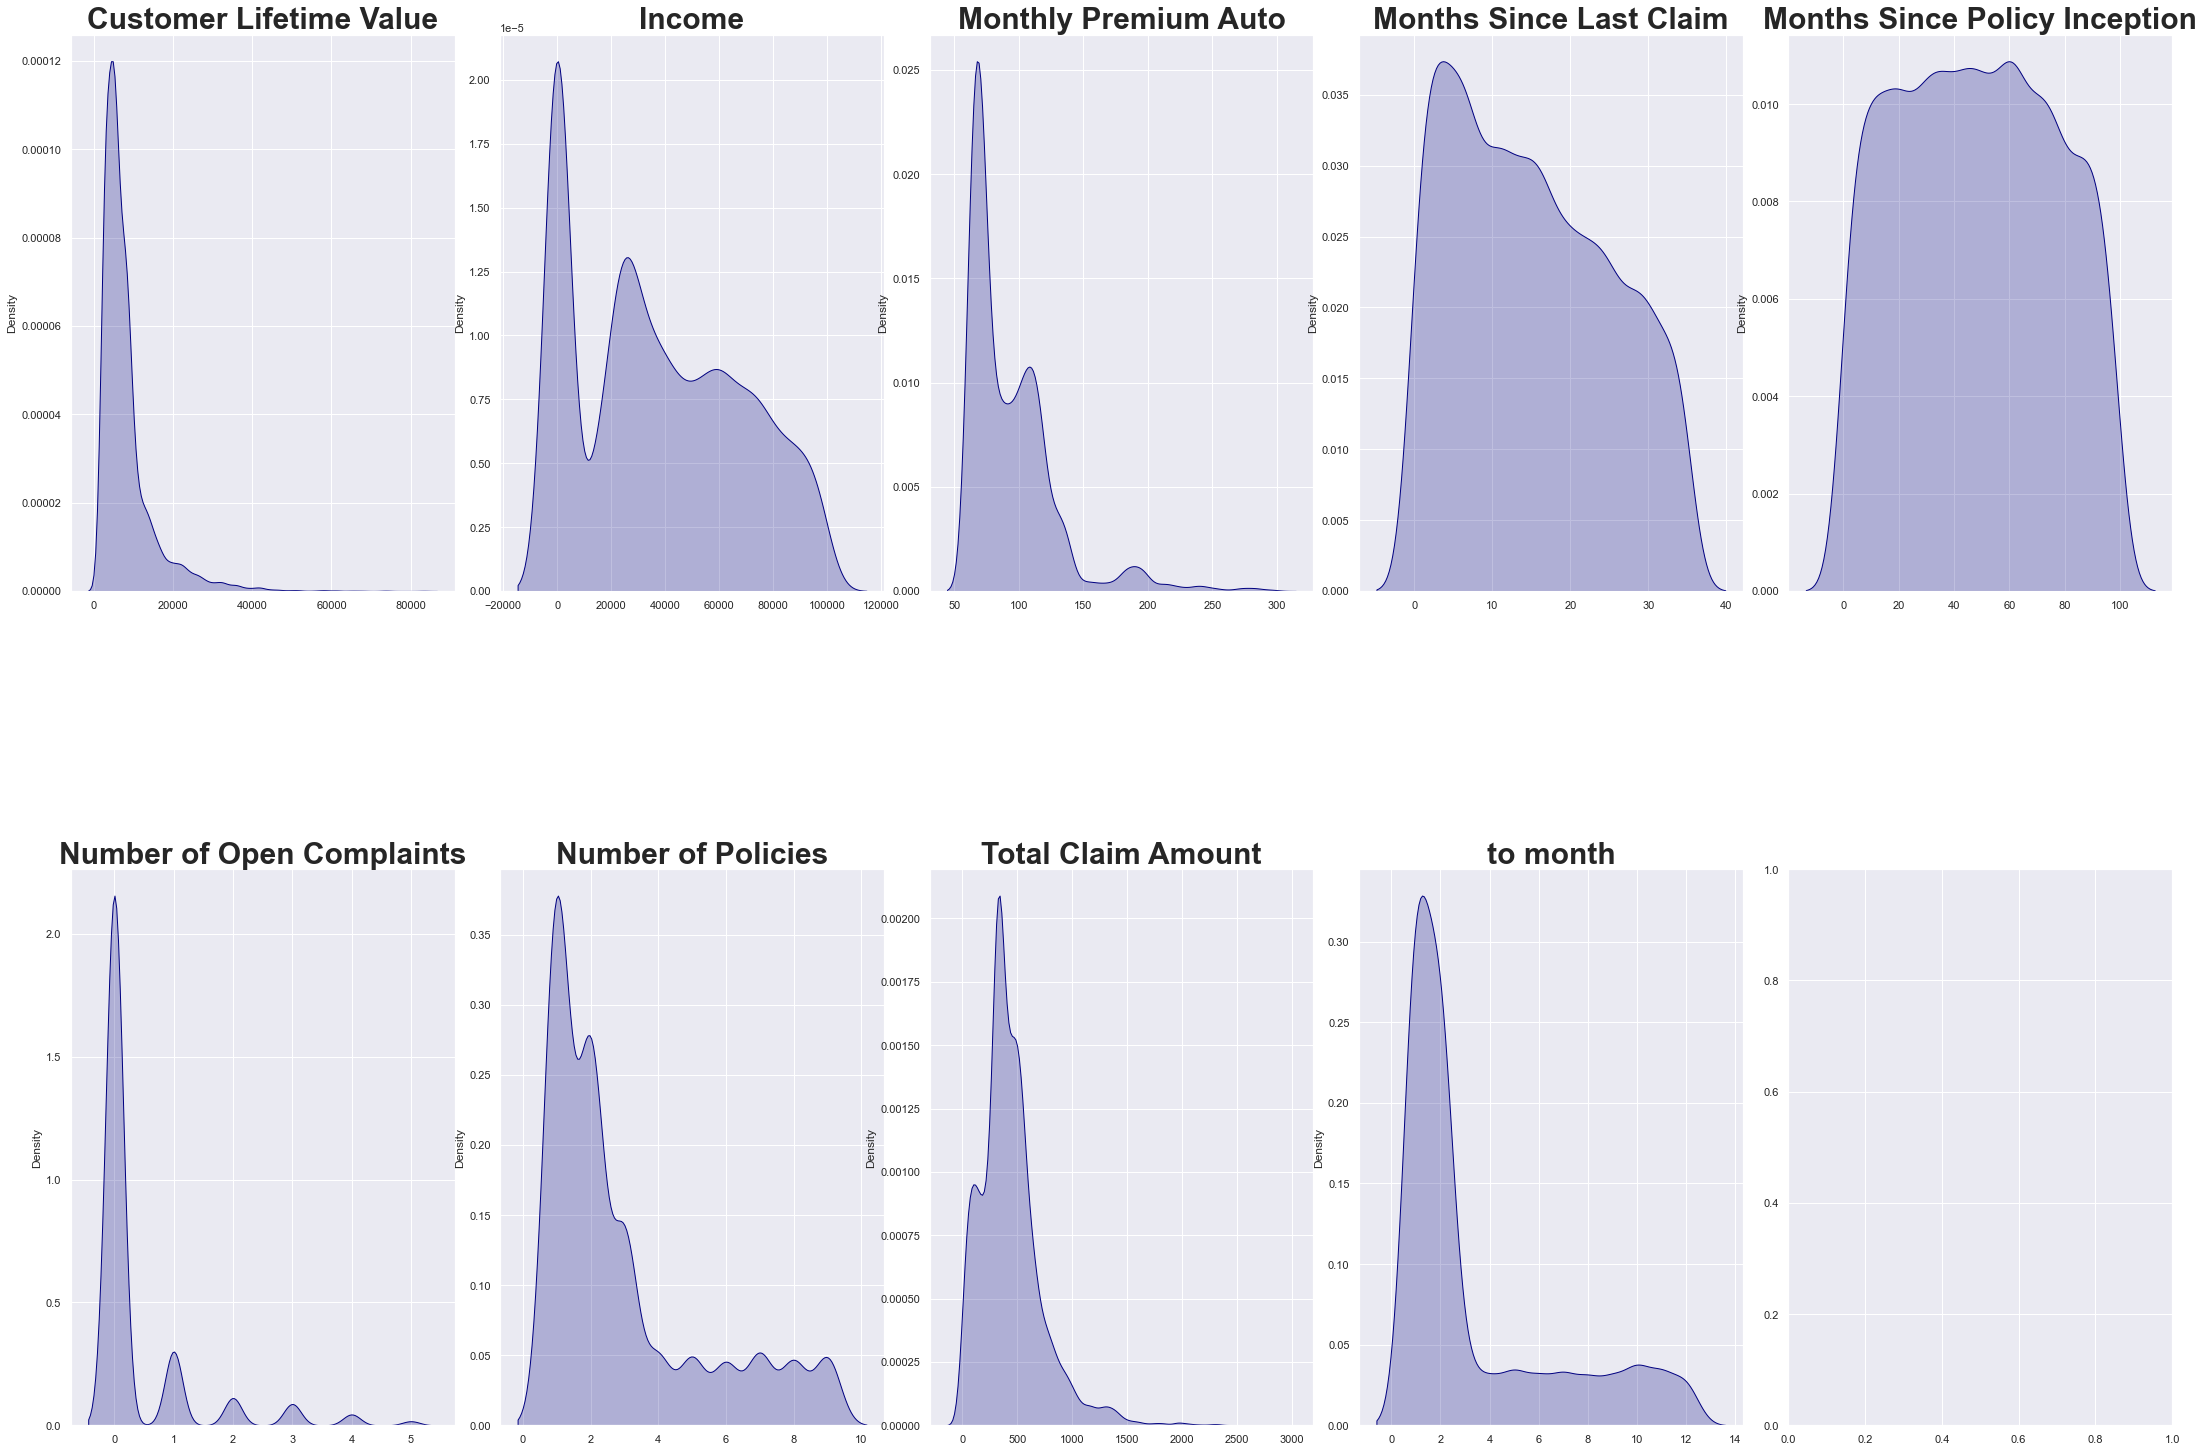

In [48]:
#display distributions for numeric data
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(30,20))
fig.tight_layout()
axeslist = [axes[0,0],axes[0,1],axes[0,2],axes[0,3],axes[0,4],axes[1,0],axes[1,1],axes[1,2],axes[1,3],axes[1,4]]
j=0
for col in auto1_num.columns:
    p= sns.kdeplot(data=auto1_num, ax=axeslist[j] ,x=col,fill=True,color="navy")
    p.set(xlabel=None)
    fig.subplots_adjust(hspace=0.5)
    axeslist[j].set_title(col,fontweight="bold", size=30)
    j= j+1

**Observations:**  
    * all  are right skewed  except month since last policy inception and income  
    * Customer Lifetime Value,Monthly Premium Auto,Number of Open Complaints & Total Claim Amount are leptokurtic 


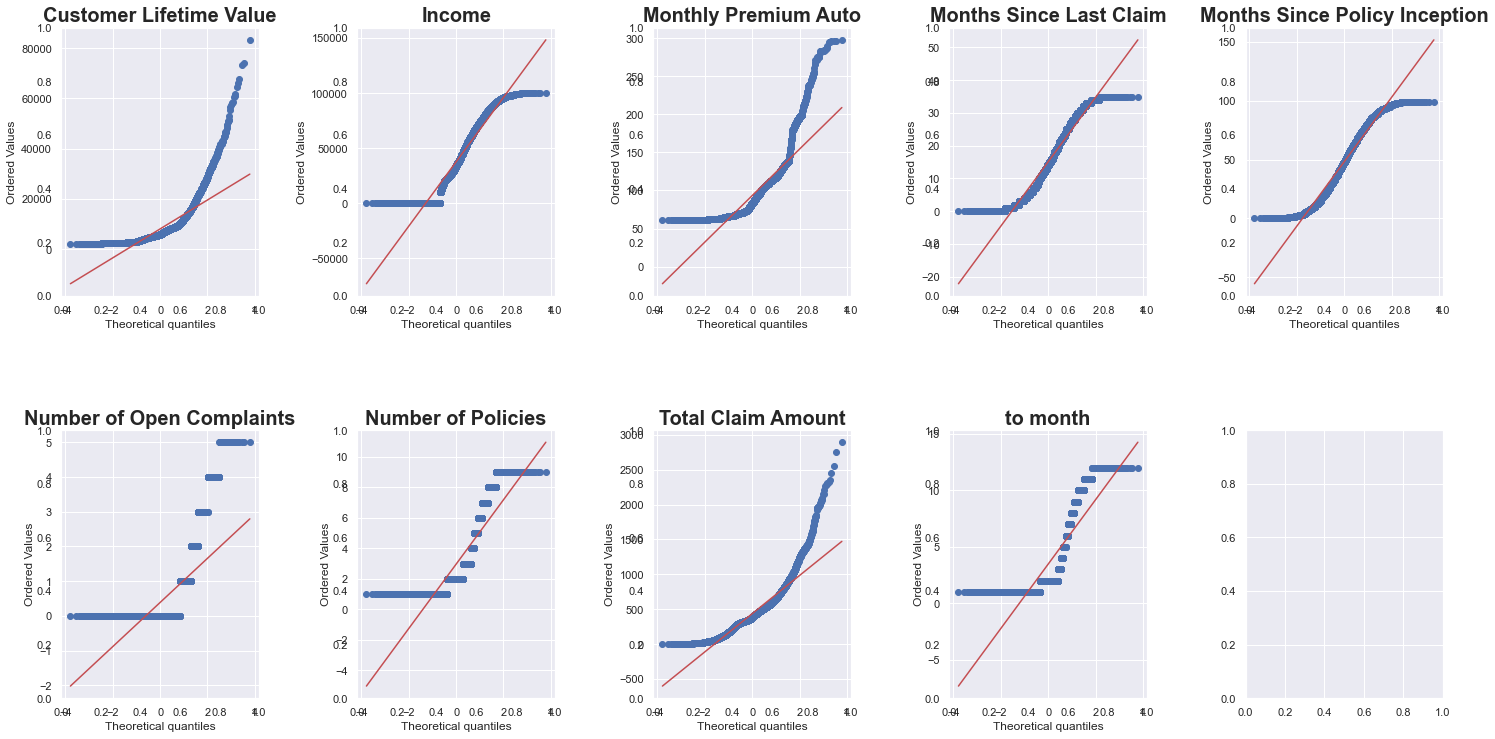

In [49]:
#Review QQ Plot for other normally distributed columns
import scipy.stats as stats
import pylab
#cols = ['Flight_trans_12','Bonus_trans','Days_since_enroll','Bonus_miles','Balance','Flight_miles_12mo','Qual_miles']
fig, axes = plt.subplots(2, 5, sharex=False, figsize=(20,10))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10]
j=0

for col in auto1_num.columns:
    ax = fig.add_subplot(2, 5, nfig[j])
    p=stats.probplot(auto1_num[col], dist="norm", plot=ax)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1


**Observations:**  
    * All columns are not normally distributed   
    * We will apply 'yeo-johnson' PowerTransformer on the non gaussian features when we create pipeline. 

In [50]:
from scipy.stats import shapiro
def shapiroWilkTest(df):
    # create an Empty DataFrame object
    scorecard = pd.DataFrame()
    alpha = 0.05
    clm= []
    stat1=[]
    p1=[]
    dist=[]
    j=0
    for c in df.columns:  
        stat, p = shapiro(df.iloc[:,j])
        clm.append(c)
        stat1.append(stat)
        p1.append(p)
        if p > alpha:
            dist.append('Gaussian') 
        else:
            dist.append('Not Gaussian')
        j=j+1
    scorecard['column'] = clm
    scorecard['stat'] = stat1
    scorecard['p'] = p1
    scorecard['Distribution'] = dist
    return scorecard

In [51]:
#Apply Shapiro-Wilk to test the null hypothesis that the data was drawn from a normal distribution.
shapiroWilkTest(auto1_num)

c:\users\aanand.oradev\appdata\local\programs\python\python39\lib\site-packages\scipy\stats\morestats.py:1681: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,column,stat,p,Distribution
0,Customer Lifetime Value,0.703373,0.000000e+00,Not Gaussian
1,Income,0.921651,0.000000e+00,Not Gaussian
2,Monthly Premium Auto,0.788858,0.000000e+00,Not Gaussian
3,Months Since Last Claim,0.950154,0.000000e+00,Not Gaussian
4,Months Since Policy Inception,0.961362,7.707142e-44,Not Gaussian
5,Number of Open Complaints,0.487279,0.000000e+00,Not Gaussian
6,Number of Policies,0.780395,0.000000e+00,Not Gaussian
7,Total Claim Amount,0.888321,0.000000e+00,Not Gaussian
8,to month,0.732612,0.000000e+00,Not Gaussian


##### Outlier Treatment

In [52]:
from sklearn.preprocessing import MinMaxScaler
#Normalize data to view boxplot
scalerMM = MinMaxScaler()
auto1_norm= pd.DataFrame(scalerMM.fit_transform(auto1_num))
auto1_norm.columns=auto1_num.columns


In [53]:
auto1_norm.sample(4)

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,to month
3283,0.107197,0.273442,0.151899,0.000000,0.373737,0.4,0.125,0.015427,0.272727
940,0.183922,0.554005,0.042194,0.971429,0.292929,0.0,0.125,0.088544,0.363636
3453,0.266454,0.763725,0.021097,0.714286,0.030303,0.0,0.125,0.029851,0.000000
8549,0.063629,0.244546,0.122363,0.114286,0.656566,0.0,0.375,0.086709,0.090909


<AxesSubplot:>

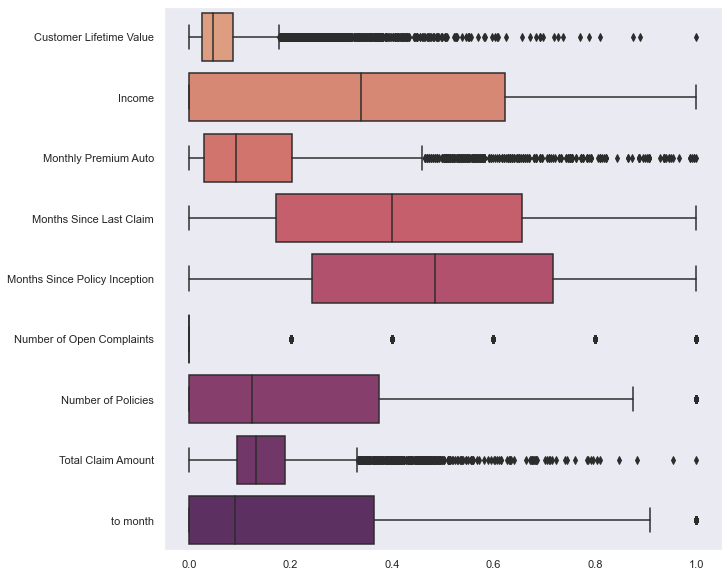

In [54]:
#View outliers for non Gaussian distributions
plt.figure(figsize=(10,10))
sns.set_style("dark")
sns.boxplot(data=auto1_norm, orient="h", palette = 'flare')

In [55]:
#function to get outliers from all numeric features
def IQR_Outliers (X, features):
    
    Outlier_df = pd.DataFrame()
    ulimit=[]
    llimit=[]
    no_of_outliers =[]
    perc = []
    feature = []


    indices = [x for x in X.index]
    print('Number of samples: ', len(indices))
    
    out_indexlist = []
        
    for col in features:
       
        #Using nanpercentile instead of percentile because of nan values
        Q1 = np.nanpercentile(X[col], 25.)
        Q3 = np.nanpercentile(X[col], 75.)
        
        cut_off = (Q3 - Q1) * 1.5
        upper, lower = Q3 + cut_off, Q1 - cut_off
        
        feature.append(col)        
        ulimit.append(upper)
        llimit.append(lower)
                
        outliers_index = X[col][(X[col] < lower) | (X[col] > upper)].index.tolist()
        outliers = X[col][(X[col] < lower) | (X[col] > upper)].values
        

        no_of_outliers.append(len(outliers))
        perc.append(round((len(outliers)*100)/len(indices),2))

        out_indexlist.extend(outliers_index)
    
    Outlier_df['feature'] = feature
    Outlier_df['no_of_outliers']= no_of_outliers 
    Outlier_df['percentage']= perc
    Outlier_df['upper_limit']= ulimit
    Outlier_df['lower_limit']= llimit
                   
    #using set to remove duplicates
    out_indexlist = list(set(out_indexlist))
    out_indexlist.sort()
    print('\nNumber of rows with outliers: ', len(out_indexlist))
    return Outlier_df   


In [56]:
#get outliers from all numeric features
IQR_Outliers(auto1_num, auto1_num.columns)

Number of samples:  9134

Number of rows with outliers:  3414


,feature,no_of_outliers,percentage,upper_limit,lower_limit
0,Customer Lifetime Value,817,8.94,16414.039912,-3457.621076
1,Income,0,0.00,155800.000000,-93480.000000
2,Monthly Premium Auto,430,4.71,170.500000,6.500000
3,Months Since Last Claim,0,0.00,48.500000,-19.500000
4,Months Since Policy Inception,0,0.00,141.500000,-46.500000
5,Number of Open Complaints,1882,20.60,0.000000,0.000000
6,Number of Policies,416,4.55,8.500000,-3.500000
7,Total Claim Amount,453,4.96,960.399730,-140.626647
8,to month,282,3.09,11.000000,-5.000000


lets analyze the 6 columns containing outliers

In [57]:
auto1_num['Customer Lifetime Value'].value_counts()

7200.664877     6
17497.522010    6
2248.449633     6
8092.876960     6
6057.072080     6
               ..
9162.063169     1
2374.147419     1
6874.848270     1
9934.865795     1
2611.836866     1
Name: Customer Lifetime Value, Length: 8041, dtype: int64

<AxesSubplot:xlabel='Customer Lifetime Value', ylabel='Count'>

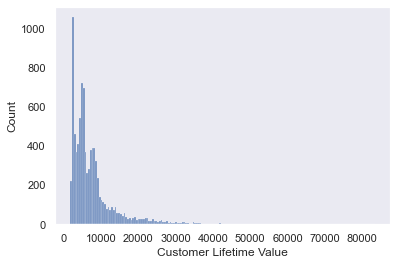

In [58]:
sns.histplot(data=auto1_num, x='Customer Lifetime Value')

Customer Lifetime Value outliers are 817 .  We will loose data based on the distribution above (10%.  no outlier treatment needed. 

In [59]:
auto1_num['Monthly Premium Auto'].value_counts()

65     348
66     307
71     304
73     302
63     289
      ... 
273      1
287      1
268      1
232      1
286      1
Name: Monthly Premium Auto, Length: 202, dtype: int64

<AxesSubplot:xlabel='Monthly Premium Auto', ylabel='Count'>

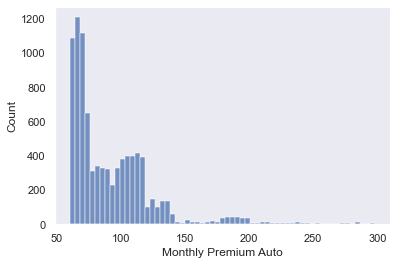

In [60]:
sns.histplot(data=auto1_num, x='Monthly Premium Auto')

Monthly Premium Auto outliers are 430 . We will loose data based on the distribution above. no outlier treatment needed.Similarly for the other 4 columns we will normalize the data,no outlier treatment needed.

##### Categorical features

In [61]:
auto1_cat.sample(2)

,Coverage,Education,Vehicle Size,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class
8198,Basic,College,Medsize,California,No,Unemployed,M,Suburban,Single,Personal L3,Offer2,Call Center,Four-Door Car
6319,Basic,College,Medsize,Oregon,No,Medical Leave,M,Suburban,Married,Special L2,Offer1,Agent,Four-Door Car


In [62]:
auto1_cat.shape

(9134, 13)

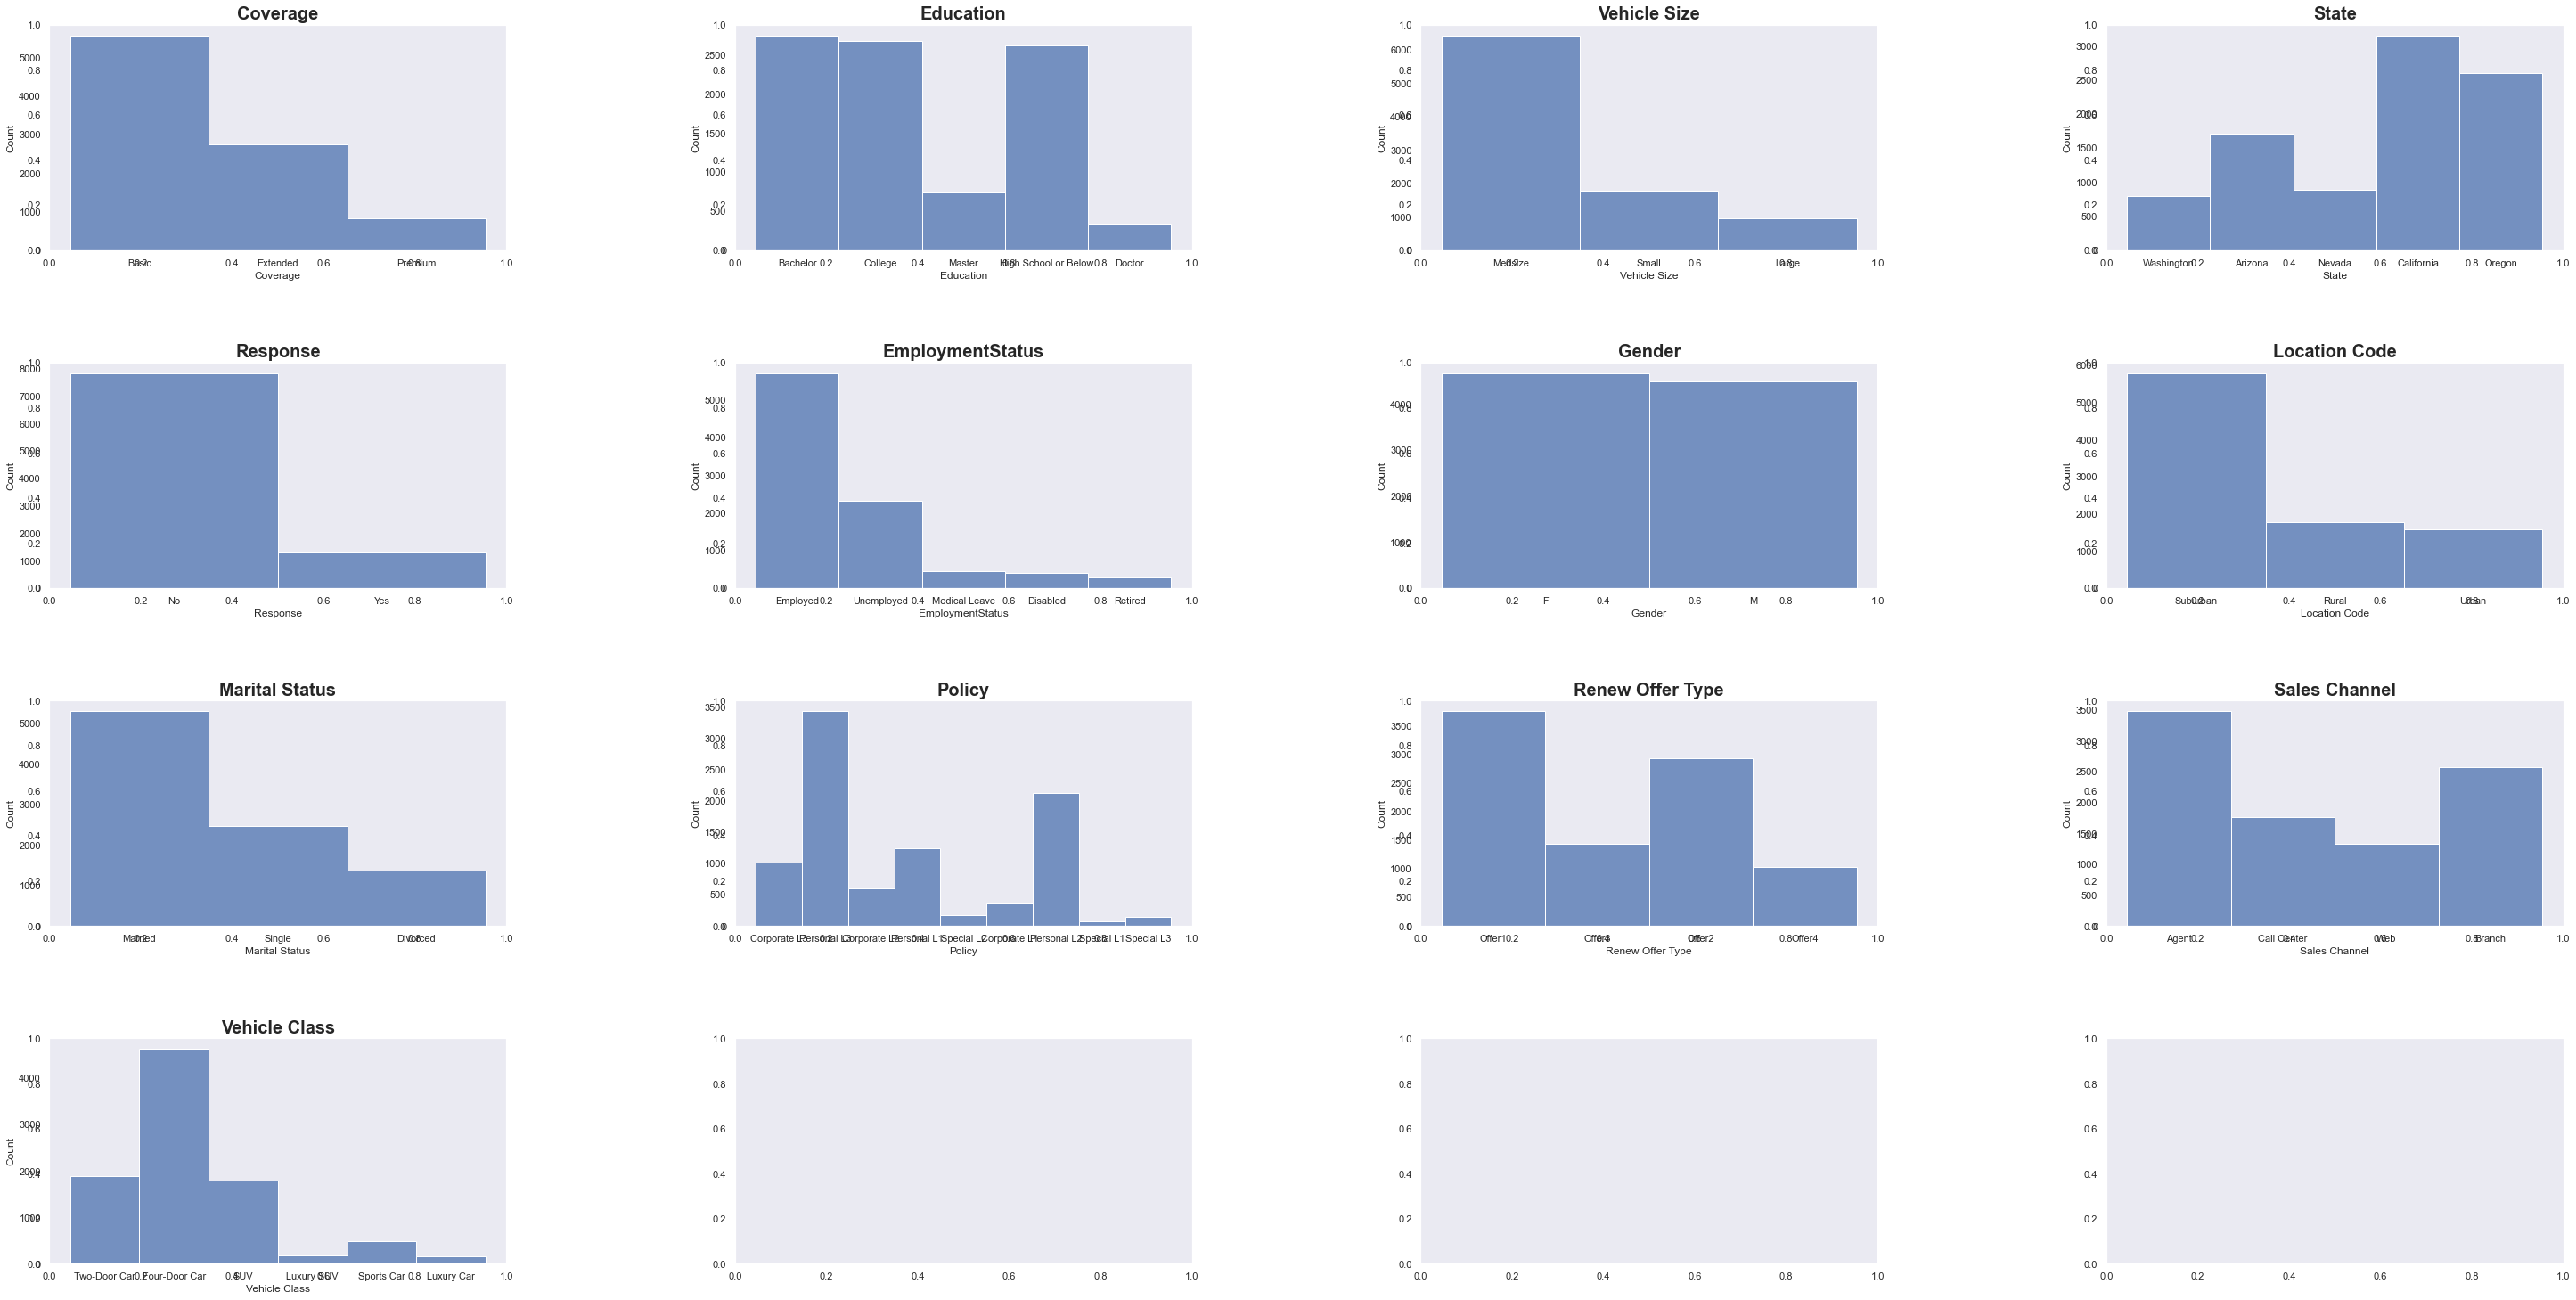

In [63]:
fig, axes = plt.subplots(4, 4, sharex=False, figsize=(40,20))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10,11,12,13]
j=0

for col in auto1_cat.columns:
    ax = fig.add_subplot(4, 4, nfig[j])
    p=sns.histplot(data=auto1_cat, x=col)
    ax.set_title(col,fontweight="bold", size=20)
    fig.subplots_adjust(wspace=0.5)
    fig.subplots_adjust(hspace=0.5)
    j= j+1

We will encode these features using OneHotEncoder and ordinal encoder

### Multivariate Analysis

#### Pair-wise Scatter Plots

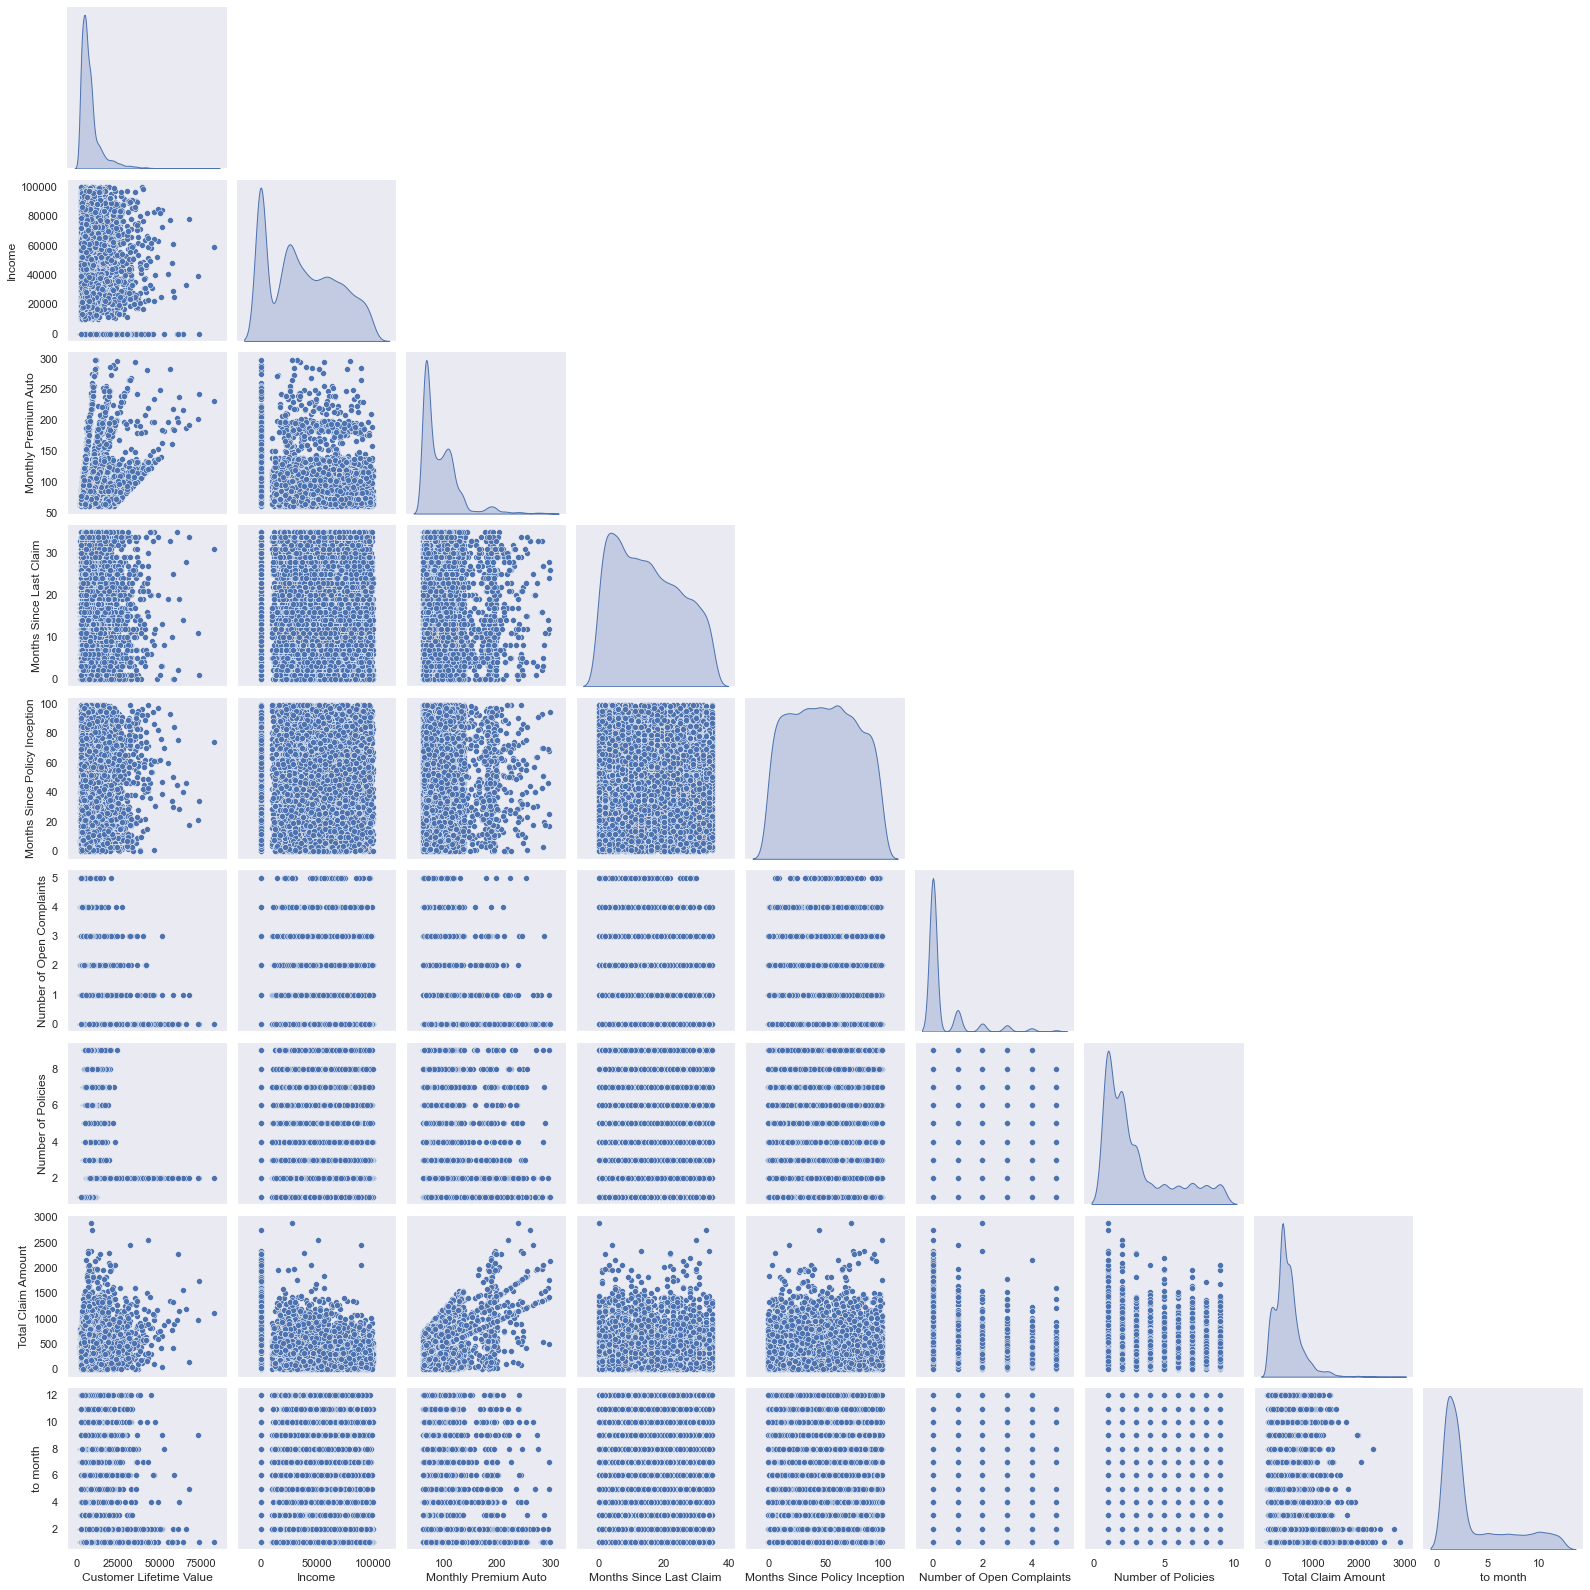

In [64]:
from matplotlib import rcParams
rcParams['figure.figsize'] = 30,20
sns.pairplot(auto1_num,diag_kind="kde", diag_kws=dict(shade=True),corner=True)
#fig.suptitle('Airline Attributes Pairwise Plots', fontsize=14)

#### Triangular Heat Map

<AxesSubplot:>

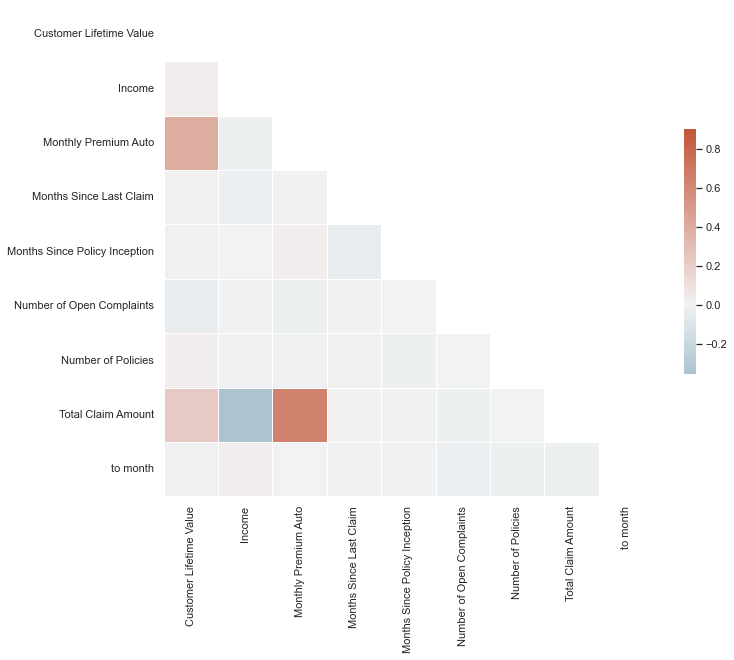

In [65]:
sns.set_theme(style="white")

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(auto1_num.corr(), dtype=bool))

corr= auto1_num.corr(method ='pearson')

# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(corr)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

#### Correlation matrix

In [66]:
auto1_num.corr(method ='pearson')

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,to month
Customer Lifetime Value,1.000000,0.024366,0.396262,0.011517,0.009418,-0.036343,0.021955,0.226451,-0.007444
Income,0.024366,1.000000,-0.016665,-0.026715,-0.000875,0.006408,-0.008656,-0.355254,0.017982
Monthly Premium Auto,0.396262,-0.016665,1.000000,0.005026,0.020257,-0.013122,-0.011233,0.632017,0.002178
Months Since Last Claim,0.011517,-0.026715,0.005026,1.000000,-0.042959,0.005354,0.009136,0.007563,-0.009089
Months Since Policy Inception,0.009418,-0.000875,0.020257,-0.042959,1.000000,-0.001158,-0.013333,0.003335,0.003329
Number of Open Complaints,-0.036343,0.006408,-0.013122,0.005354,-0.001158,1.000000,0.001498,-0.014241,-0.025711
Number of Policies,0.021955,-0.008656,-0.011233,0.009136,-0.013333,0.001498,1.000000,-0.002354,-0.015183
Total Claim Amount,0.226451,-0.355254,0.632017,0.007563,0.003335,-0.014241,-0.002354,1.000000,-0.015363
to month,-0.007444,0.017982,0.002178,-0.009089,0.003329,-0.025711,-0.015183,-0.015363,1.000000


In [67]:
#Get only highly correlated items

df = auto1_num.corr().abs().round(1)
df = auto1_num.corr().round(1)
for column in df:
    ac = df[column].round(1)
    replace_col = df[((ac < 0.5) & (ac >= 0))| ((ac > -0.5) & (ac <= 0))].index
    df.at[replace_col, column]='blah'
df

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount,to month
Customer Lifetime Value,1.0,blah,blah,blah,blah,blah,blah,blah,blah
Income,blah,1.0,blah,blah,blah,blah,blah,blah,blah
Monthly Premium Auto,blah,blah,1.0,blah,blah,blah,blah,0.6,blah
Months Since Last Claim,blah,blah,blah,1.0,blah,blah,blah,blah,blah
Months Since Policy Inception,blah,blah,blah,blah,1.0,blah,blah,blah,blah
Number of Open Complaints,blah,blah,blah,blah,blah,1.0,blah,blah,blah
Number of Policies,blah,blah,blah,blah,blah,blah,1.0,blah,blah
Total Claim Amount,blah,blah,0.6,blah,blah,blah,blah,1.0,blah
to month,blah,blah,blah,blah,blah,blah,blah,blah,1.0


**Observations**  
* We can see that Total Claim Amount has very high positive correlation with Monthly Premium Auto which is expected


In [68]:
auto1[categorical_features].nunique().sum()

54

In [69]:
auto1[categorical_features].nunique()

Coverage            3
Education           5
Vehicle Size        3
State               5
Response            2
EmploymentStatus    5
Gender              2
Location Code       3
Marital Status      3
Policy              9
Renew Offer Type    4
Sales Channel       4
Vehicle Class       6
dtype: int64

### Data Preprocessing

In [70]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder  
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline

ordinal_features = ['Coverage','Education','Vehicle Size']
nominal_features = ['State','Response','EmploymentStatus','Gender','Location Code','Marital Status',
                   'Policy','Renew Offer Type','Sales Channel','Vehicle Class']
numeric_features = ['Customer Lifetime Value','Income','Monthly Premium Auto','Months Since Last Claim',
                   'Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount',
                    'to month']
categorical_features = ['Coverage','Education','Vehicle Size','State','Response','EmploymentStatus','Gender',
                       'Location Code','Marital Status','Policy','Renew Offer Type','Sales Channel','Vehicle Class']


############# numeric_transformer ####################
numeric_transformer = make_column_transformer(
    (PowerTransformer(method='yeo-johnson', standardize=False), numeric_features),    
)


############# categorical_transformer ####################
coverage_lvl =  [['Basic', 'Extended', 'Premium']]
education_lvl = [['High School or Below', 'College', 'Bachelor', 'Master', 'Doctor']]
vehicle_size =  [['Small', 'Medsize', 'Large']]

categorical_transformer = make_column_transformer(
    (OrdinalEncoder(categories=coverage_lvl), ['Coverage']),
    (OrdinalEncoder(categories=education_lvl), ['Education']),
    (OrdinalEncoder(categories=vehicle_size), ['Vehicle Size']),
    (OneHotEncoder(drop='first'), nominal_features),
)

#nominal_transformer = Pipeline(
#    steps=[('ohe',OneHotEncoder(drop='first'))]
#)

preprocessor = ColumnTransformer(
    transformers=[
        ("numeric", numeric_transformer, numeric_features),
        ("categorical", categorical_transformer, categorical_features),
    ]
)
scaler = ColumnTransformer(
    transformers=[
        ("scaling", MinMaxScaler(), slice(0,45)),
    ]
)

### Create Preprocessing Pipeline

In [71]:
# We will later Append classifier to preprocessing pipeline.
pipe = Pipeline(
    steps=[("preprocessor", preprocessor),
           ("scaling", scaler)]
)

In [72]:
# Apply the tranformation
auto1_transformed = pipe.fit_transform(auto1) 

In [73]:
auto1.shape

(9134, 22)

In [74]:
auto1_transformed.shape

(9134, 45)

In [75]:
#verify shape remains same after tranformation
tuple(map(lambda i, j: i - j, auto1.shape, auto1_transformed.shape))

(0, -23)

In [76]:
# View sample records after transformation
auto1_transformed[0,:]

array([0.16701739, 0.84710623, 0.18204367, 0.94570625, 0.10136721,
       0.        , 0.        , 0.3735688 , 0.38581765, 0.        ,
       0.5       , 0.5       , 0.        , 0.        , 0.        ,
       1.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 0.        , 1.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 1.        ])

In [77]:
# View Tranformation steps
pipe.named_steps

{'preprocessor': ColumnTransformer(transformers=[('numeric',
                                  ColumnTransformer(transformers=[('powertransformer',
                                                                   PowerTransformer(standardize=False),
                                                                   ['Customer '
                                                                    'Lifetime '
                                                                    'Value',
                                                                    'Income',
                                                                    'Monthly '
                                                                    'Premium '
                                                                    'Auto',
                                                                    'Months '
                                                                    'Since Last '
                                       

### Model Building

#### K Means Clustering

##### Evaluate k with Elbow Graph

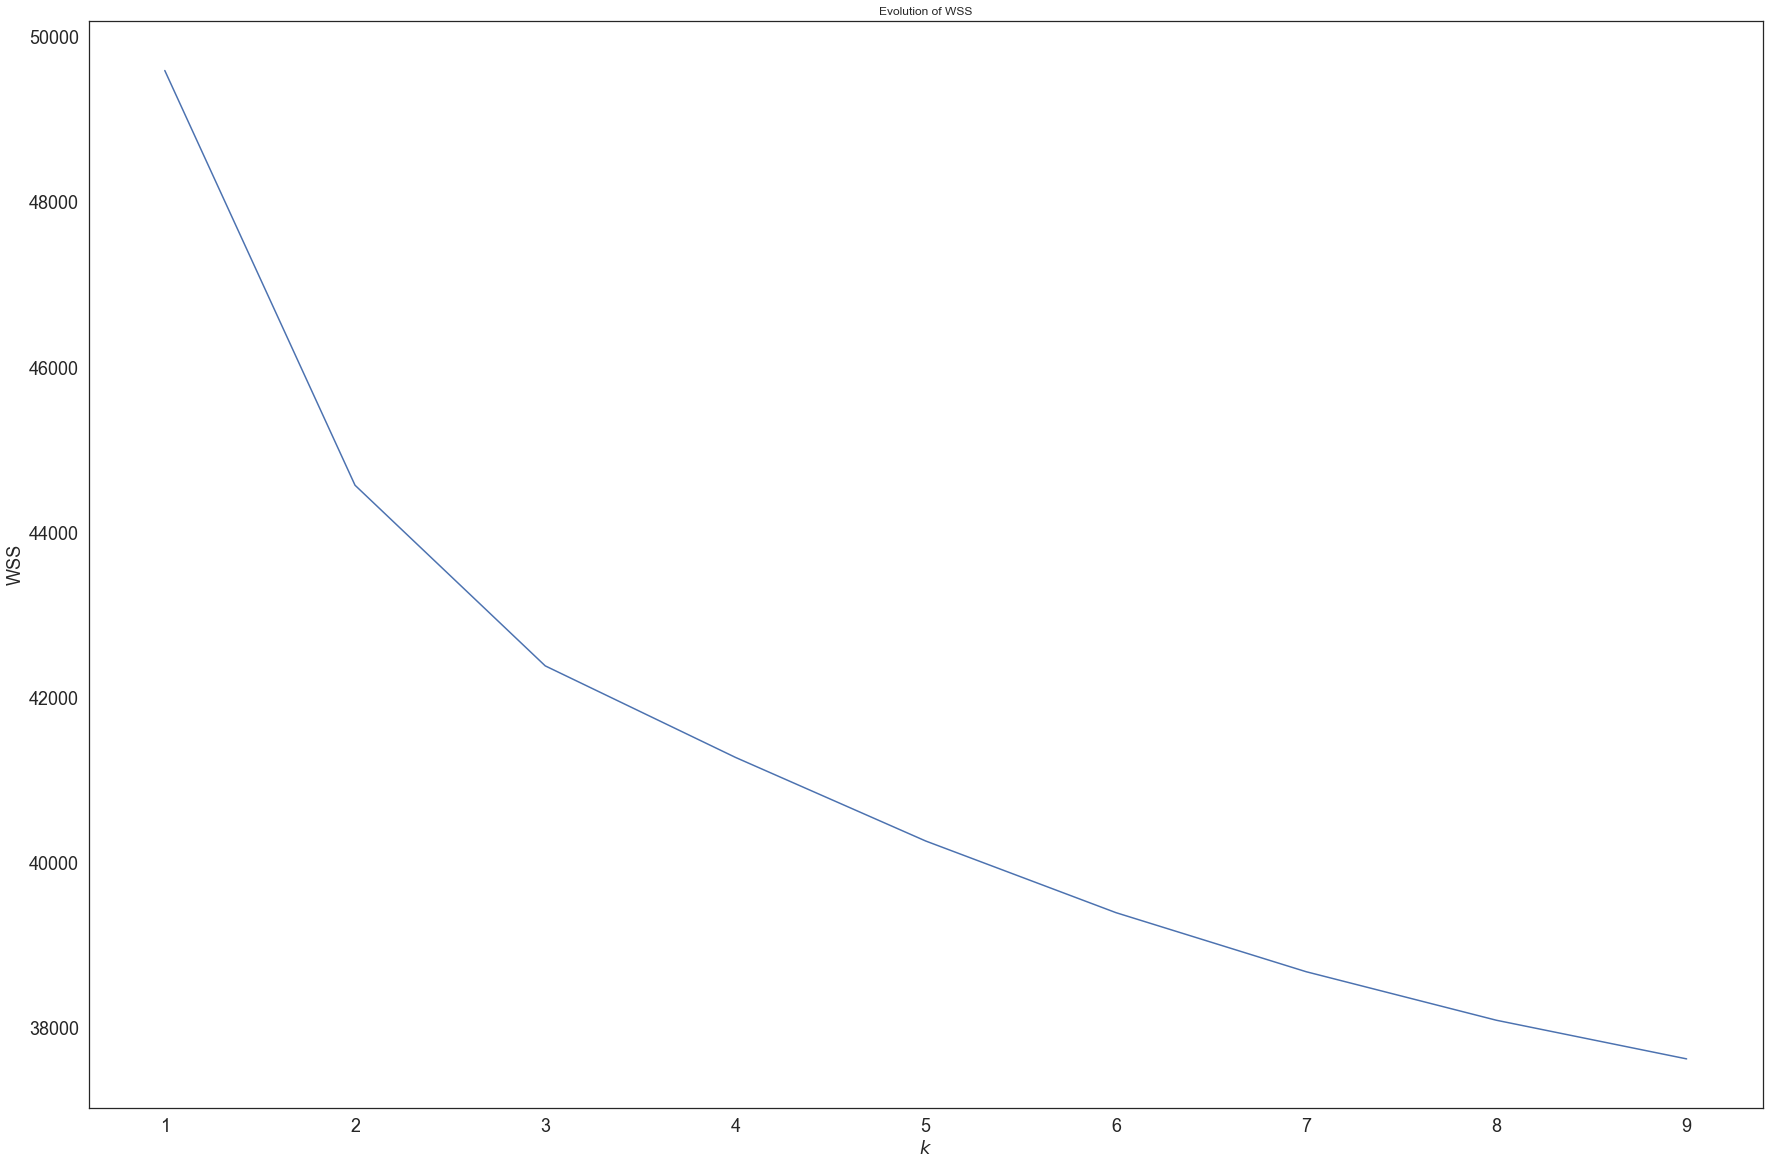

In [78]:
from sklearn.cluster import KMeans

inertia = []
k = range(1,10)
for iter in k:
    kmeans = KMeans(init = 'k-means++',n_clusters=iter, random_state=2)
    kmeans.fit(auto1_transformed)
    y_kmeans = kmeans.predict(auto1_transformed)
    centers = kmeans.cluster_centers_
    inertia.append(kmeans.inertia_ ) # we already store this for later, inertia=WSS

plt.figure()
plt.title("Evolution of WSS")
plt.plot(k, inertia)
plt.ylabel("WSS",fontsize=18)
plt.xlabel("$k$",fontsize=18)
plt.xticks(k,fontsize=18)
plt.yticks(fontsize=18)
plt.show()

##### Apply K Means clustering

In [97]:
kmeans = KMeans(init = 'k-means++' ,n_clusters=2, random_state=2)
kmeans.fit(auto1_transformed)
labels_ = kmeans.predict(auto1_transformed)

In [98]:
# Data points spread
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1])

In [99]:
# Data points count per label
unique, counts = np.unique(labels_, return_counts=True)
np.asarray((unique, counts)).T

array([[   0, 6400],
       [   1, 2734]], dtype=int64)

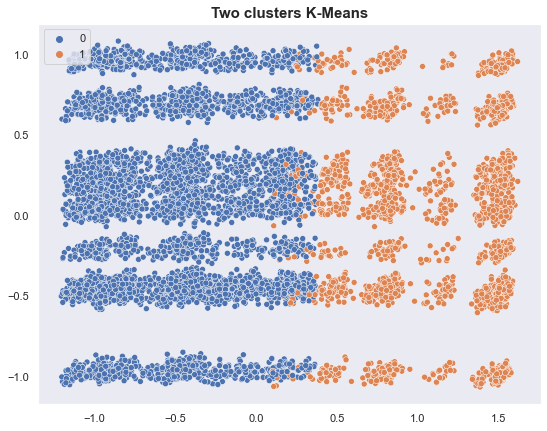

In [100]:
from sklearn import decomposition
# Transform data to visualize data in 2d
sns.set_style('dark')
pca = decomposition.PCA(n_components=3)
auto_pca = pca.fit_transform(auto1_transformed)
plt.figure(figsize=(9,7))
sns.scatterplot(hue=kmeans.labels_, x=auto_pca[:,0], y=auto_pca[:,1],palette="deep")
plt.title("Two clusters K-Means",fontsize=15,fontweight="bold")
plt.show()

### Benefits/impact of the solution 

In [83]:
#Link the clusters to original data

cluster_labels = pd.Series(kmeans.labels_)
auto['cluster'] = cluster_labels # creating a new column and assigning it to new column

In [84]:
auto.groupby('cluster').size()

cluster
0    6400
1    2734
dtype: int64

In [85]:
#airline1.groupby('cluster', as_index=False)['Bonus_trans','Bonus_miles'].mean()
auto.groupby('cluster').mean()

,Customer Lifetime Value,Income,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Total Claim Amount
cluster,,,,,,,,
0,8169.742789,52456.94750,93.029844,15.062500,47.782969,0.388281,2.96500,369.058927
1,7619.155979,3013.18398,93.662765,15.177762,48.723848,0.375274,2.96891,586.316720


* Cluster 1 has 2734 customers where the claim amount is significantly higher than cluster 0.
* Cluster 1 customers has lower income compared to cluster 0

In [87]:
#Link the clusters to original data

cluster_labels = pd.Series(kmeans.labels_)
auto1_cat['cluster'] = cluster_labels # creating a new column and assigning it to new column


In [88]:
auto1_cat.sample(2)

,Coverage,Education,Vehicle Size,State,Response,EmploymentStatus,Gender,Location Code,Marital Status,Policy,Renew Offer Type,Sales Channel,Vehicle Class,cluster
4138,Basic,College,Large,Arizona,No,Disabled,F,Suburban,Married,Special L2,Offer4,Branch,Two-Door Car,0
6673,Basic,Bachelor,Small,California,No,Disabled,F,Suburban,Married,Personal L3,Offer4,Agent,Four-Door Car,0


In [89]:
auto.groupby('cluster').size()

cluster
0    6400
1    2734
dtype: int64

In [90]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

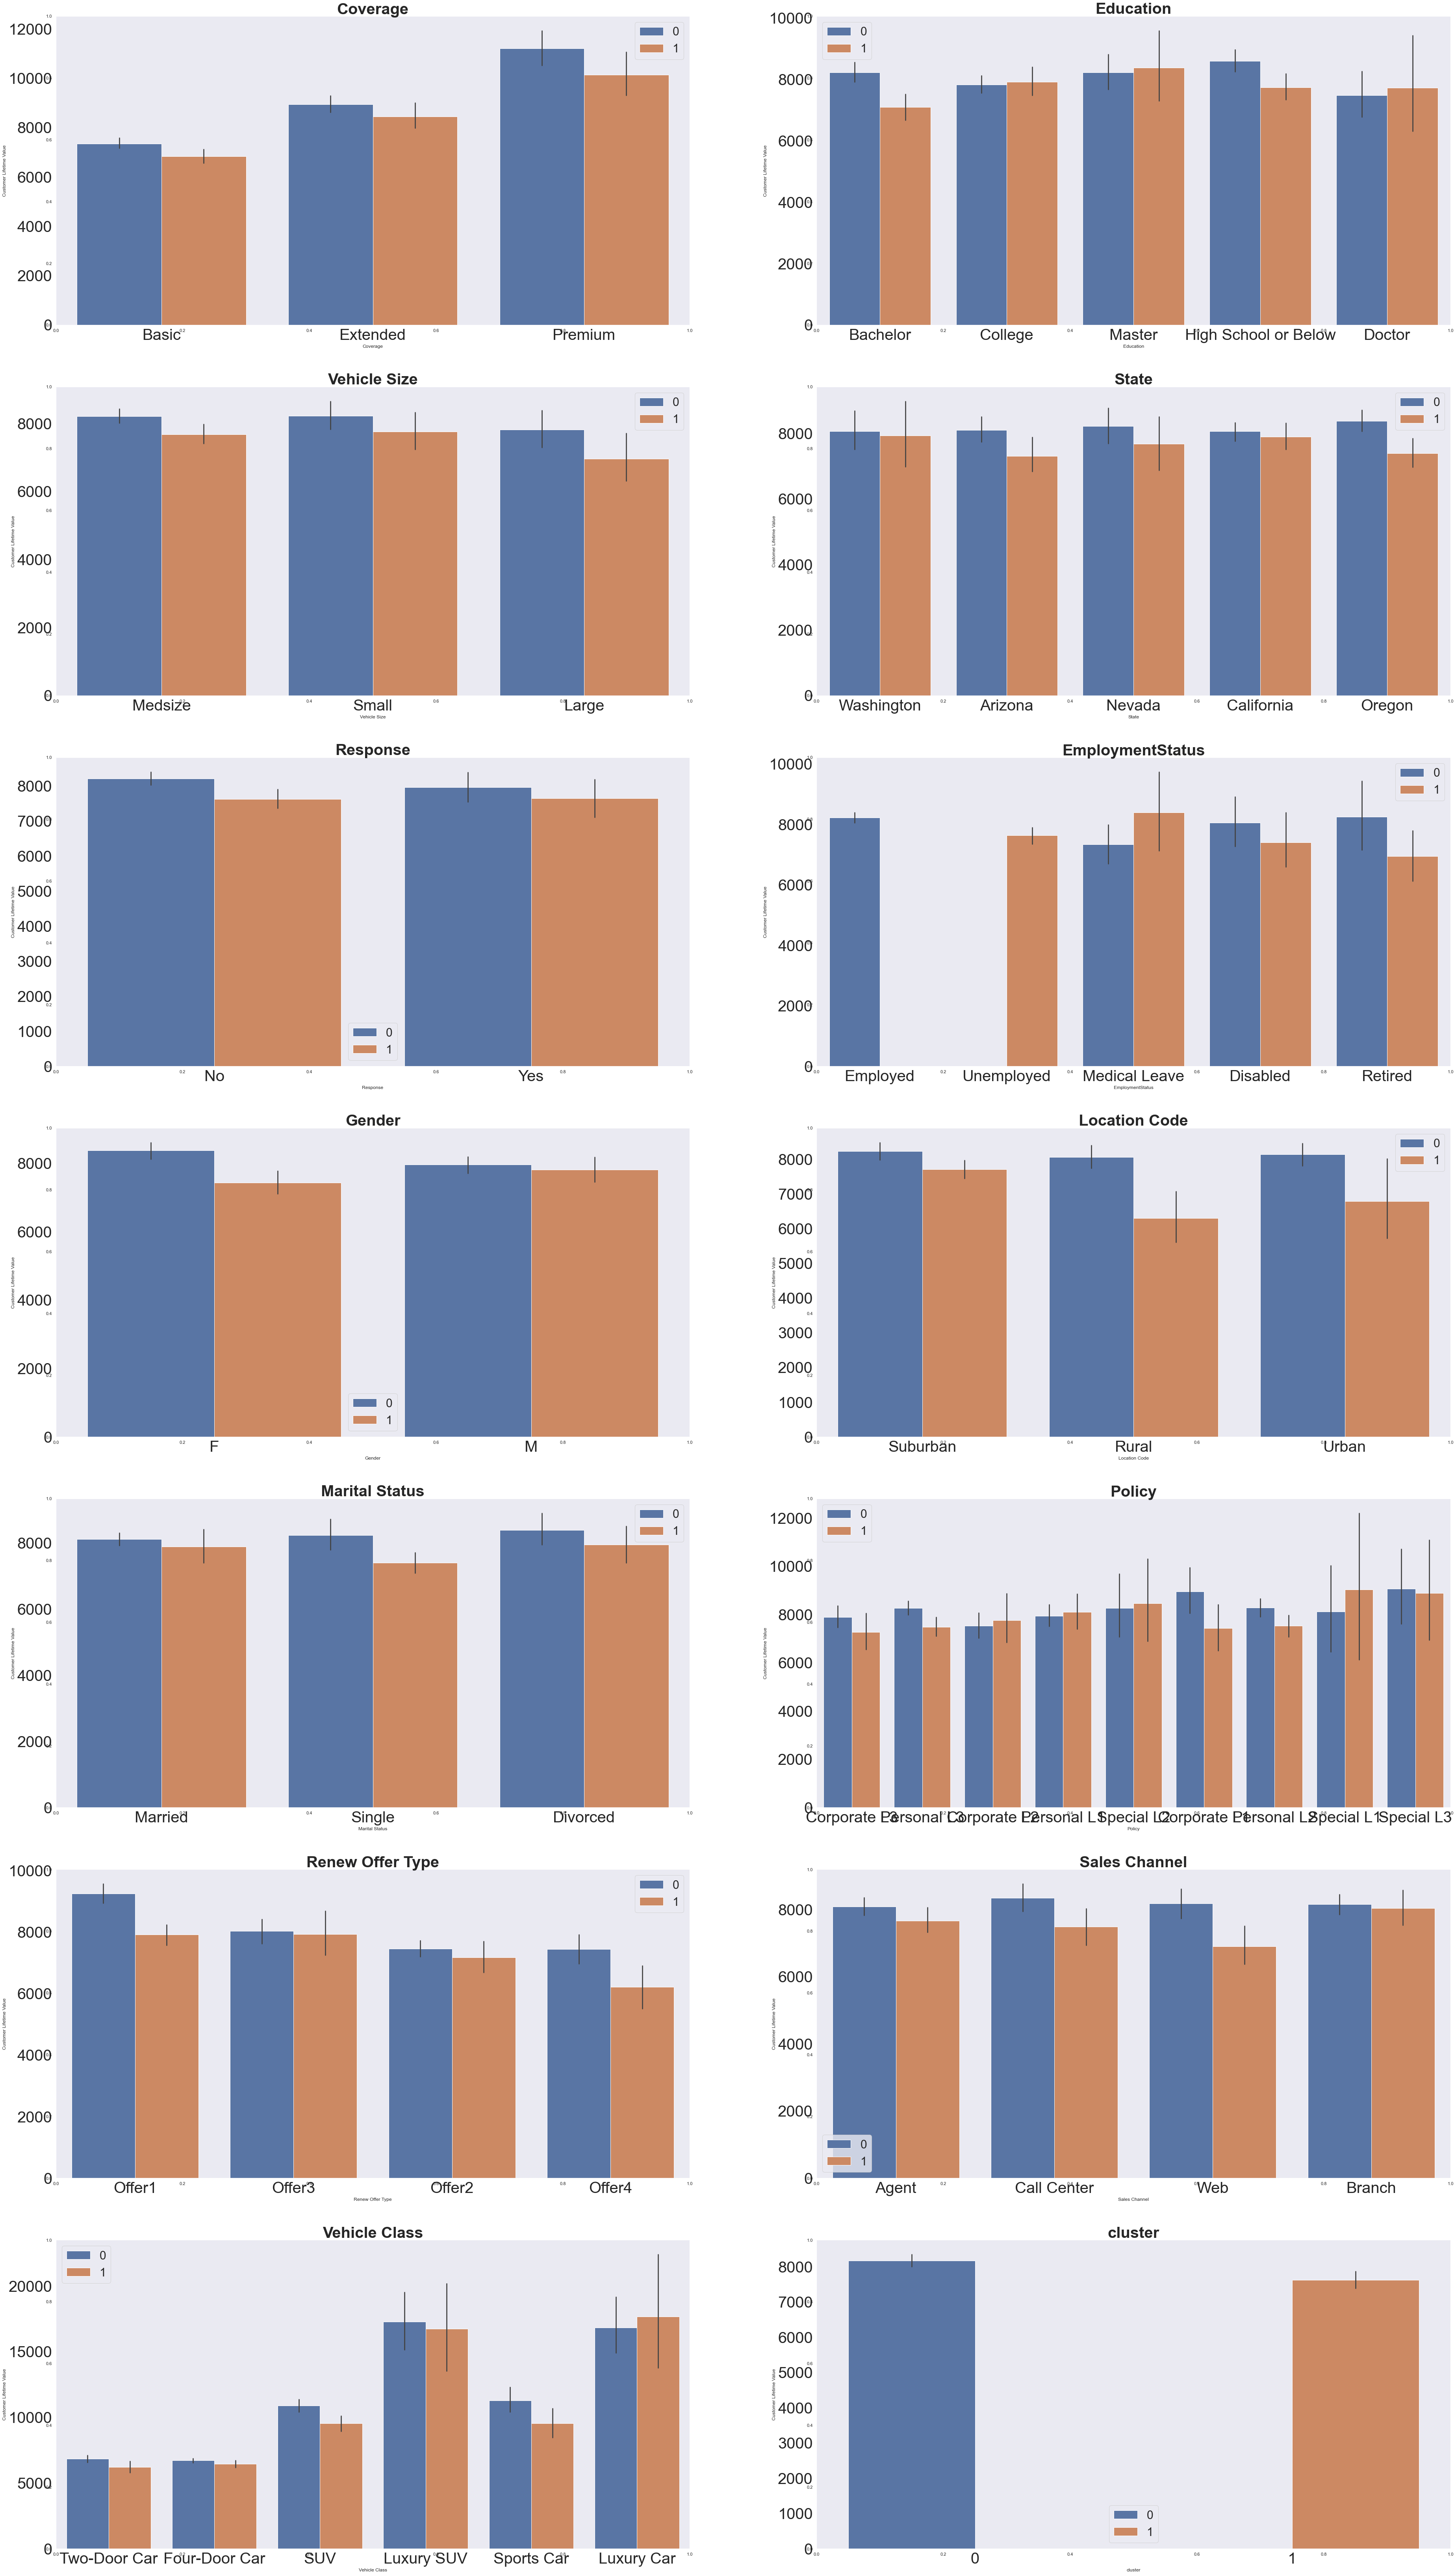

In [91]:
fig, axes = plt.subplots(7, 2, sharex=False, figsize=(50,90))
fig.tight_layout()
nfig = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]
j=0

for col in auto1_cat.columns:
    ax = fig.add_subplot(7, 2, nfig[j])
    #p=stats.probplot(telco1_num[col], dist="norm", plot=ax)
    #p=sns.histplot(data=telco1_cat, x=col)
    ax = sns.barplot(x=col, y='Customer Lifetime Value', hue="cluster", data=auto)
    ax.set_title(col,fontweight="bold", size=40)
    ax.tick_params(labelsize=40)
    ax.legend(fontsize=30)
    fig.subplots_adjust(wspace=0.2)
    fig.subplots_adjust(hspace=0.2)
    j= j+1

In [92]:
auto.groupby('cluster').size()

cluster
0    6400
1    2734
dtype: int64

* Cluster 1 has less premium customers.  
* Cluster 1 has no online premium tech support. The company could offer premium tech support to these customers.  
* Cluster 0 has more yes responses